**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Handling**

In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/trainLabels.csv.zip'

destination_folder = '/content/drive/MyDrive/'

os.makedirs(destination_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Unzipping completed!")

Unzipping completed!


In [ ]:
import os
import pandas as pd


image_folder = '/content/drive/MyDrive/train_dr'
image_filenames = [filename.split('.')[0] for filename in os.listdir(image_folder) if filename.endswith('.jpeg')]


csv_file_path = '/content/drive/MyDrive/trainLabels.csv'
df = pd.read_csv(csv_file_path)


filtered_df = df[df['image'].isin(image_filenames)]


dataset_folder = os.path.dirname(csv_file_path)
cleaned_csv_file_path = os.path.join(dataset_folder, "cleaned_labels.csv")
filtered_df.to_csv(cleaned_csv_file_path, index=False)

print("Cleaned CSV file saved successfully in the dataset folder.")


Cleaned CSV file saved successfully in the dataset folder.


In [ ]:
csv_file_path = '/content/drive/MyDrive/cleaned_labels.csv'

data = pd.read_csv(csv_file_path)

print(data.value_counts().sum())
print(data['level'].unique())
print(data['level'].value_counts().unique())
data.head()

8408
[0 1 2 4 3]
[6150 1283  588  221  166]


,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


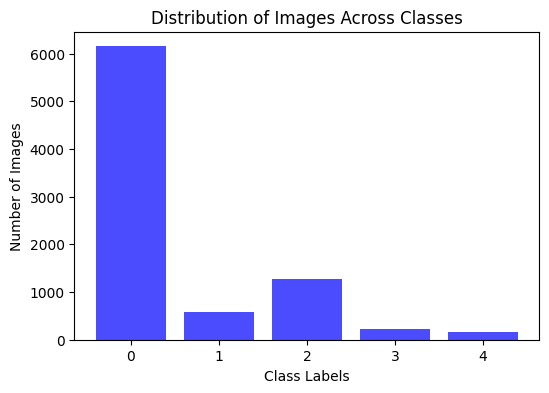

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = data['level'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='blue', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')


plt.xticks(class_counts.index)

plt.show()


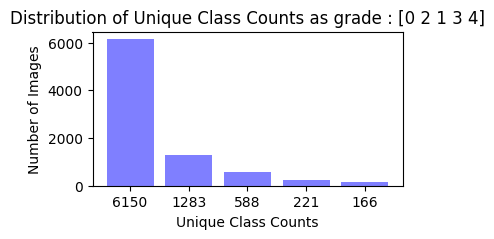

Number of images in each class:
Class 0: 6150 images
Class 2: 1283 images
Class 1: 588 images
Class 3: 221 images
Class 4: 166 images


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
class_counts = data['level'].value_counts()

unique_counts = class_counts.unique()

plt.figure(figsize=(4, 2))
plt.bar(range(len(unique_counts)), unique_counts, color='blue', alpha=0.5)

plt.xlabel('Unique Class Counts')
plt.ylabel('Number of Images')
plt.title('Distribution of Unique Class Counts as grade : [0 2 1 3 4]')

plt.xticks(range(len(unique_counts)), unique_counts)

plt.show()

print("Number of images in each class:")
for level, count in class_counts.items():
    print(f"Class {level}: {count} images")


In [ ]:
import os
import shutil
import pandas as pd

csv_file_path = '/content/drive/MyDrive/cleaned_labels.csv'

image_folder = '/content/drive/MyDrive/train_dr'
cutmix_folder = os.path.join(image_folder, 'cutmixfolder')

os.makedirs(cutmix_folder, exist_ok=True)

df = pd.read_csv(csv_file_path)

filtered_df = df[df['level'].isin([1, 3, 4])]

for _, row in filtered_df.iterrows():
    file_name = row['image'] + '.jpeg'
    source_path = os.path.join(image_folder, file_name)
    target_path = os.path.join(cutmix_folder, file_name)

    if os.path.exists(source_path):
        shutil.copy(source_path, target_path)
        print(f"Copied {file_name} to {cutmix_folder}")
    else:
        print(f"File {file_name} not found in {image_folder}")

print("Images from classes 1, 3, and 4 have been copied to the cutmixfolder.")


Copied 15_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 16_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 16_right.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 17_right.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 114_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 114_right.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 163_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 163_right.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 178_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 178_right.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 1002_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 1008_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 1008_right.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 1020_left.jpeg to /content/drive/MyDrive/train_dr/cutmixfolder
Copied 1020_right.jpeg to /c

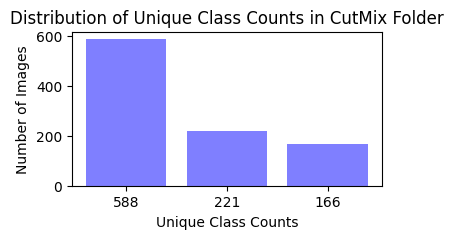

Number of images in each class in the cutmixfolder:
Class 1: 588 images
Class 3: 221 images
Class 4: 166 images


In [ ]:
import pandas as pd

cutmix_folder = '/content/drive/MyDrive/train_dr/cutmixfolder'

csv_file_path = '/content/drive/MyDrive/trainLabels.csv'
df = pd.read_csv(csv_file_path)

df['file_path'] = df['image'] + '.jpeg'
df_filtered = df[df['file_path'].apply(lambda x: os.path.isfile(os.path.join(cutmix_folder, x)))]

class_counts = df_filtered['level'].value_counts()

unique_counts = class_counts.unique()

plt.figure(figsize=(4, 2))
plt.bar(range(len(unique_counts)), unique_counts, color='blue', alpha=0.5)

plt.xlabel('Unique Class Counts')
plt.ylabel('Number of Images')
plt.title('Distribution of Unique Class Counts in CutMix Folder')

plt.xticks(range(len(unique_counts)), unique_counts)

plt.show()

print("Number of images in each class in the cutmixfolder:")
for level, count in class_counts.items():
    print(f"Class {level}: {count} images")

In [ ]:
df['file_path'] = df['image'] + '.jpeg'
df_filtered = df[df['file_path'].apply(lambda x: os.path.isfile(os.path.join(cutmix_folder, x)))]

class_counts = df_filtered['level'].value_counts()

target_count = 800
additional_needed = {cls: target_count - count for cls, count in class_counts.items() if count < target_count}

print("Additional images needed for each class:")
print(additional_needed)


Additional images needed for each class:
{1: 212, 3: 579, 4: 634}


In [ ]:
import os
import shutil
import pandas as pd

cutmix_folder = '/content/drive/MyDrive/train_dr/cutmixfolder'
output_base_folder = '/content/drive/MyDrive/train_dr/organized_classes'

csv_file_path = '/content/drive/MyDrive/cleaned_labels.csv'

df = pd.read_csv(csv_file_path)

df['file_path'] = df['image'] + '.jpeg'
df_filtered = df[df['file_path'].apply(lambda x: os.path.isfile(os.path.join(cutmix_folder, x)))]

class_folders = {1: 'Class_1', 3: 'Class_3', 4: 'Class_4'}
for level, folder_name in class_folders.items():
    os.makedirs(os.path.join(output_base_folder, folder_name), exist_ok=True)

for index, row in df_filtered.iterrows():
    class_level = row['level']
    if class_level in class_folders:
        src_path = os.path.join(cutmix_folder, row['file_path'])
        dest_folder = os.path.join(output_base_folder, class_folders[class_level])
        dest_path = os.path.join(dest_folder, row['file_path'])
        shutil.move(src_path, dest_path)

print("Images have been organized into separate folders based on their class labels.")


Images have been organized into separate folders based on their class labels.


In [ ]:
import os

folder_path = '/content/drive/MyDrive/train_dr/cutmixfolder'
files = os.listdir(folder_path)
print(files)


[]


In [ ]:
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

image1 = Image.open('/content/drive/MyDrive/train_dr/organized_classes/Class_4/19485_right.jpeg').resize((256, 256))
image2 = Image.open('/content/drive/MyDrive/train_dr/organized_classes/Class_4/19471_right.jpeg').resize((256, 256))

image1 = np.array(image1)
image2 = np.array(image2)

img_tensor1 = tf.convert_to_tensor(image1, dtype=tf.float32)
img_tensor2 = tf.convert_to_tensor(image2, dtype=tf.float32)


#**CUTMIX Augmentation**

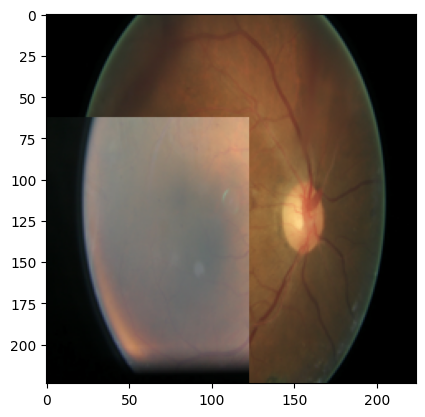

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

def cutmix(image1, image2):
    DIM = image1.shape[0]
    if image1.shape != image2.shape:
        raise ValueError("Both images must have the same shape.")

    x = tf.cast(tf.random.uniform([], 0, DIM), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, DIM), tf.int32)
    b = tf.random.uniform([], 0, 1)
    WIDTH = tf.cast(DIM * tf.math.sqrt(1 - b), tf.int32)
    ya = tf.math.maximum(0, y - WIDTH // 2)
    yb = tf.math.minimum(DIM, y + WIDTH // 2)
    xa = tf.math.maximum(0, x - WIDTH // 2)
    xb = tf.math.minimum(DIM, x + WIDTH // 2)

    one = image1[ya:yb, 0:xa, :]
    two = image2[ya:yb, xa:xb, :]
    three = image1[ya:yb, xb:DIM, :]
    middle = tf.concat([one, two, three], axis=1)
    img = tf.concat([image1[0:ya, :, :], middle, image1[yb:DIM, :, :]], axis=0)

    img_np = img.numpy().astype(np.uint8)
    img_pil = Image.fromarray(img_np)

    return img_pil

img1 = tf.random.uniform((224, 224, 3), maxval=255, dtype=tf.int32)
img2 = tf.random.uniform((224, 224, 3), maxval=255, dtype=tf.int32)
result_image = cutmix(img_tensor1, img_tensor2)
result_image = tf.clip_by_value(result_image, 0, 255)  # Ensure values are within JPEG range
result_image = tf.cast(result_image, tf.uint8)
plt.imshow(result_image)


In [ ]:
a, b = df_filtered[df_filtered['level']==4].sample(2)['file_path'].values
print(a,b)

13999_left.jpeg 13938_left.jpeg


**For Class 4 Cutmix image generation**

In [ ]:
output_dir = '/content/drive/MyDrive/cutmixed_images/4/'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

def cutmix(image1, image2):
    DIM = image1.shape[0]
    if image1.shape != image2.shape:
        raise ValueError("Both images must have the same shape.")

    x = tf.cast(tf.random.uniform([], 0, DIM), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, DIM), tf.int32)
    b = tf.random.uniform([], 0, 1)
    WIDTH = tf.cast(DIM * tf.math.sqrt(1 - b), tf.int32)
    ya = tf.math.maximum(0, y - WIDTH // 2)
    yb = tf.math.minimum(DIM, y + WIDTH // 2)
    xa = tf.math.maximum(0, x - WIDTH // 2)
    xb = tf.math.minimum(DIM, x + WIDTH // 2)

    one = image1[ya:yb, 0:xa, :]
    two = image2[ya:yb, xa:xb, :]
    three = image1[ya:yb, xb:DIM, :]
    middle = tf.concat([one, two, three], axis=1)
    img = tf.concat([image1[0:ya, :, :], middle, image1[yb:DIM, :, :]], axis=0)

    img_np = img.numpy().astype(np.uint8)
    img_pil = Image.fromarray(img_np)

    return img_pil

for i in range(634):
    a, b = df_filtered[df_filtered['level'] == 4].sample(2)['file_path'].values
    image1 = Image.open(f'/content/drive/MyDrive/train_dr/organized_classes/Class_4/{a}').resize((224, 224))
    image2 = Image.open(f'/content/drive/MyDrive/train_dr/organized_classes/Class_4/{b}').resize((224, 224))

    image1 = np.array(image1)
    image2 = np.array(image2)

    img_tensor1 = tf.convert_to_tensor(image1, dtype=tf.float32)
    img_tensor2 = tf.convert_to_tensor(image2, dtype=tf.float32)

    result_image = cutmix(img_tensor1, img_tensor2)
    result_image = tf.clip_by_value(result_image, 0, 255)
    result_image = tf.cast(result_image, tf.uint8)

    file_path = f'/content/drive/MyDrive/cutmixed_images/4/cutmixed_{i}.jpeg'
    jpeg_image = tf.io.encode_jpeg(result_image)
    tf.io.write_file(file_path, jpeg_image)


In [ ]:
import os

directory = '/content/drive/MyDrive/cutmixed_images/4'

for filename in os.listdir(directory):
    if filename.startswith("cutmixed_") and filename.endswith(".jpeg"):
        file_id = filename.split('_')[1].split('.')[0]
        new_filename = f"cutmixed_4_{file_id}.jpeg"
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, new_filename)
        os.rename(old_filepath, new_filepath)

print("Files renamed successfully.")


Files renamed successfully.


In [ ]:
import os
import csv
directory = '/content/drive/MyDrive/cutmixed_images/4'

labels_csv = '/content/drive/MyDrive/cutmixed_images/labelsX.csv'

with open(labels_csv, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'label'])

    for filename in os.listdir(directory):
        if filename.startswith("cutmixed_4_") and filename.endswith(".jpeg"):
            writer.writerow([filename, 4])

print("Labels CSV file created and labels added successfully.")


Labels CSV file created and labels added successfully.


**For class 3 cutmix image generation**

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

def cutmix(image1, image2):
    DIM = image1.shape[0]
    if image1.shape != image2.shape:
        raise ValueError("Both images must have the same shape.")

    x = tf.cast(tf.random.uniform([], 0, DIM), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, DIM), tf.int32)
    b = tf.random.uniform([], 0, 1)
    WIDTH = tf.cast(DIM * tf.math.sqrt(1 - b), tf.int32)
    ya = tf.math.maximum(0, y - WIDTH // 2)
    yb = tf.math.minimum(DIM, y + WIDTH // 2)
    xa = tf.math.maximum(0, x - WIDTH // 2)
    xb = tf.math.minimum(DIM, x + WIDTH // 2)

    one = image1[ya:yb, 0:xa, :]
    two = image2[ya:yb, xa:xb, :]
    three = image1[ya:yb, xb:DIM, :]
    middle = tf.concat([one, two, three], axis=1)
    img = tf.concat([image1[0:ya, :, :], middle, image1[yb:DIM, :, :]], axis=0)

    return img

output_dir = 'C:/Users/prera/Downloads/DR_data/cutmixed_images/3'
os.makedirs(output_dir, exist_ok=True)

for i in range(579):
    a, b = df_filtered[df_filtered['level'] == 3].sample(2)['file_path'].values
    image1 = Image.open(f'/content/drive/MyDrive/train_dr/organized_classes/Class_3/{a}').resize((224, 224))
    image2 = Image.open(f'/content/drive/MyDrive/train_dr/organized_classes/Class_3/{b}').resize((224, 224))

    image1 = np.array(image1)
    image2 = np.array(image2)

    img_tensor1 = tf.convert_to_tensor(image1, dtype=tf.float32)
    img_tensor2 = tf.convert_to_tensor(image2, dtype=tf.float32)

    result_image = cutmix(img_tensor1, img_tensor2)
    result_image = tf.clip_by_value(result_image, 0, 255)
    result_image = tf.cast(result_image, tf.uint8)

    file_path = f'/content/drive/MyDrive/cutmixed_images/3/cutmixed_{i}.jpeg'
    jpeg_image = tf.io.encode_jpeg(result_image)

    tf.io.write_file(file_path, jpeg_image)


In [ ]:
import os

directory = '/content/drive/MyDrive/cutmixed_images/3'

for filename in os.listdir(directory):
    if filename.startswith("cutmixed_") and filename.endswith(".jpeg"):
        file_id = filename.split('_')[1].split('.')[0]
        new_filename = f"cutmixed_class3_{file_id}.jpeg"
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, new_filename)
        os.rename(old_filepath, new_filepath)

print("Files renamed successfully.")


Files renamed successfully.


In [ ]:
import os
import csv

directory = '/content/drive/MyDrive/cutmixed_images/3'

labels_csv = '/content/drive/MyDrive/cutmixed_images/labelsY.csv'

with open(labels_csv, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'label'])

    for filename in os.listdir(directory):
        if filename.startswith("cutmixed_class3_") and filename.endswith(".jpeg"):
            writer.writerow([filename, 3])

print("LabelsY CSV file created and labels added successfully.")


LabelsY CSV file created and labels added successfully.


**For class 1 cutmix image generation**

In [ ]:
for i in range(212):
    a, b = df_filtered[df_filtered['level']==1].sample(2)['file_path'].values
    image1 = Image.open(f'/content/drive/MyDrive/train_dr/organized_classes/Class_1/{a}').resize((224, 224))
    image2 = Image.open(f'/content/drive/MyDrive/train_dr/organized_classes/Class_1/{b}').resize((224, 224))

    image1 = np.array(image1)
    image2 = np.array(image2)

    img_tensor1 = tf.convert_to_tensor(image1, dtype=tf.float32)
    img_tensor2 = tf.convert_to_tensor(image2, dtype=tf.float32)

    result_image = cutmix(img_tensor1, img_tensor2)
    result_image = tf.clip_by_value(result_image, 0, 255)
    result_image = tf.cast(result_image, tf.uint8)

    file_path = f'/content/drive/MyDrive/cutmixed_images/1/cutmixed_{i}.jpeg'
    jpeg_image = tf.io.encode_jpeg(result_image)

    tf.io.write_file(file_path, jpeg_image)

In [ ]:
import os
import csv
directory = '/content/drive/MyDrive/cutmixed_images/1'

labels_csv = '/content/drive/MyDrive/cutmixed_images/labelsZ.csv'

with open(labels_csv, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'label'])

    for filename in os.listdir(directory):
        if filename.startswith("cutmixed_") and filename.endswith(".jpeg"):
            writer.writerow([filename, 1])

print("Labels CSV file created and labels added successfully.")


Labels CSV file created and labels added successfully.


**Copying all cutmixed_images to train_dr**

In [ ]:
import os
import shutil

directories = [
    '/content/drive/MyDrive/cutmixed_images/1',
    '/content/drive/MyDrive/cutmixed_images/3',
    '/content/drive/MyDrive/cutmixed_images/4'
]

final_directory = '/content/drive/MyDrive/train_dr'

os.makedirs(final_directory, exist_ok=True)

for directory in directories:
    for filename in os.listdir(directory):
        source = os.path.join(directory, filename)
        destination = os.path.join(final_directory, filename)
        shutil.copy(source, destination)
        print(f"Copied {filename} to {final_directory}")


Copied cutmixed_0.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_1.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_2.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_3.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_4.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_5.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_6.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_7.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_8.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_9.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_10.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_11.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_12.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_13.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_14.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_15.jpeg to /content/drive/MyDrive/train_dr
Copied cutmixed_16.jpeg to /content/drive/MyDrive/train_dr
Copied 

In [ ]:
import os

# Directory path
directory_path = '/content/drive/MyDrive/train_dr'

# List all items in the directory
items = os.listdir(directory_path)

# Count the total number of items
total_items = len(items)

print(f"Total number of items in '{directory_path}': {total_items}")


Total number of items in '/content/drive/MyDrive/train_dr': 9835
